# Logistic Regression

### Learn the basics of logistic regression and classification.

##### Contents:



## 1: Classification

As we learned in the last mission, the fundamental goal of machine learning is to understand the relationship between the independent variable(s) and the dependent variable. Specifically, we're interested in the underlying mathematical function that uses the features to generate labels. In supervised machine learning, we use training data that contains a label for each row to approximate this function.

In the previous mission, we explored a supervised machine learning technique called linear regression. Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't a good fit.

In this mission, we'll explore how to build a predictive model for these types of problems, which are known as **classification** problems. In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:

| Problem                                                                   | Sample Features                                    | Type        | Categories           | Numerical Categories |
|---------------------------------------------------------------------------|----------------------------------------------------|-------------|----------------------|----------------------|
| Should we accept this student based on their graduate school application? | College GPA, SAT Score, Quality of Recommendations | Binary      | Don't Accept, Accept | 0, 1                 |
| What is the most likely blood type of 2 parent's offspring?               | Parent 1's blood type, Parent 2's blood type.      | Multi-class | A, B, AB, O          | 1, 2, 3, 4           |

We'll focus on **binary classification** for now, where the only 2 options for values are:

- 0 for the False condition,
- 1 for the True condition.

Before we dive into classification, let's understand the data we'll be working with.

## 2: Introduction To The Data

Every year high school student and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

We'll be working with a dataset containing data on 644 applicants with the following columns:

- gre - applicant's store on the Graduate Record Exam, a generalized test for prospective graduate students.
    - Score ranges from 200 to 800.
- gpa - college grade point average.
    - Continuous between 0.0 and 4.0.
- admit - binary value
    - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.
    
Here's a preview of the dataset:

| admit | gpa      | gre        |
|-------|----------|------------|
| 0     | 3.177277 | 594.102992 |
| 0     | 3.412655 | 631.528607 |
| 0     | 2.728097 | 553.714399 |
| 0     | 3.093559 | 551.089985 |
| 0     | 3.141923 | 537.184894 |

While we can use both the gpa and gre columns to predict the admit column, we'll focus on using just the gpa column to keep things simple. Let's read the data into Pandas and visualize the relationship between gpa and admit.

#### Instructions:
- Read admissions.csv into a Dataframe named admissions.
- Use the Matplotlib method scatter to generate a scatter plot with the:
    - gpa column on the x-axis.
    - admit column on the y-axis.
- Use plt.show() to display the scatter plot.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
admissions = pd.read_csv("data/admissions.csv")
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


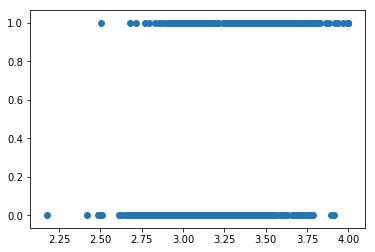

In [6]:
plt.scatter(admissions.gpa, admissions.admit)

## 3: Logistic Regression

In the previous scatter plot, you'll notice that the gpa column and the admit column do not have a clear linear relationship. Recall that the admit column only contains the values 0 and 1 and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical values**. Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.

In this mission, we'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0 otherwise.

This threshold probability is something we select, and we'll learn about how to select a good threshold probability in later missions. For now, let's dive more into how logistic regression works.